In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.linspace(0, 40, 40001)
delta_t = t[1] - t[0]
y = (t**2)/14
print(t[:40])
print(y[:40])

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039]
[0.00000000e+00 7.14285714e-08 2.85714286e-07 6.42857143e-07
 1.14285714e-06 1.78571429e-06 2.57142857e-06 3.50000000e-06
 4.57142857e-06 5.78571429e-06 7.14285714e-06 8.64285714e-06
 1.02857143e-05 1.20714286e-05 1.40000000e-05 1.60714286e-05
 1.82857143e-05 2.06428571e-05 2.31428571e-05 2.57857143e-05
 2.85714286e-05 3.15000000e-05 3.45714286e-05 3.77857143e-05
 4.11428571e-05 4.46428571e-05 4.82857143e-05 5.20714286e-05
 5.60000000e-05 6.00714286e-05 6.42857143e-05 6.86428571e-05
 7.31428571e-05 7.77857143e-05 8.25714286e-05 8.75000000e-05
 9.25714286e-05 9.77857143e-05 1.03142857e-04 1.08642857e-04]


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39]
[0.000e+00 1.000e-04 4.000e-04 9.000e-04 1.600e-03 2.500e-03 3.600e-03
 4.900e-03 6.400e-03 8.100e-03 1.000e-02 1.210e-02 1.440e-02 1.690e-02
 1.960e-02 2.250e-02 2.560e-02 2.890e-02 3.240e-02 3.610e-02 4.000e-02
 4.410e-02 4.840e-02 5.290e-02 5.760e-02 6.250e-02 6.760e-02 7.290e-02
 7.840e-02 8.410e-02 9.000e-02 9.610e-02 1.024e-01 1.089e-01 1.156e-01
 1.225e-01 1.296e-01 1.369e-01 1.444e-01 1.521e-01]


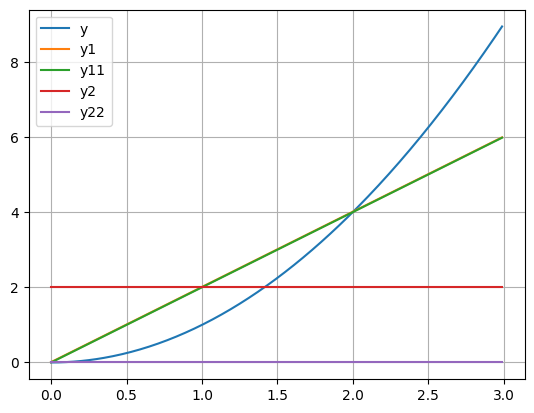

In [4]:
g = np.linspace(0,4,401);
y = (g**2)
print(g[:40])
print(y[:40])
y1 = np.diff(y)/(g[1]-g[0])
y11 = np.gradient(y)/(g[1]-g[0])
y2 = np.diff(y1)/(g[1]-g[0])
y22 = np.gradient(y1)
plt.plot(g[:300], y[:300], label='y')
plt.plot(g[:300], y1[:300], label='y1')
plt.plot(g[:300], y11[:300], label='y11')
plt.plot(g[:300], y2[:300], label='y2')
plt.plot(g[:300], y22[:300], label='y22')
plt.grid()
plt.legend()


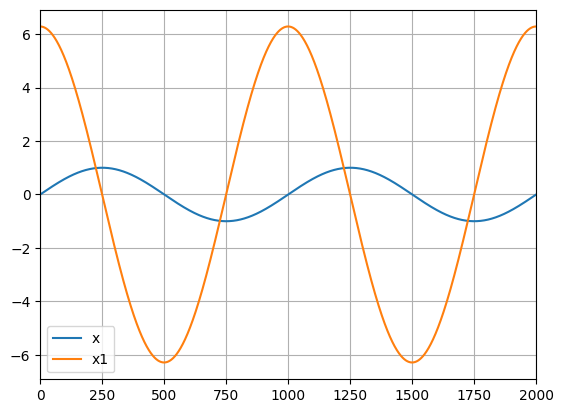

In [5]:
x = np.sin(2*np.pi*t)
x1 = np.diff(x)/delta_t
plt.plot(x, label='x')
plt.plot(x1, label='x1')
plt.xlim(0, 2000)
plt.legend()
plt.grid()

Čas v [s] za prevozit 0.5 m: 0.060 s
0.060 s
8.333333333333334 Hz


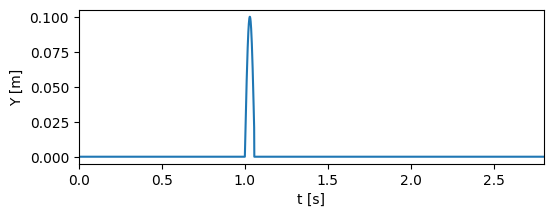

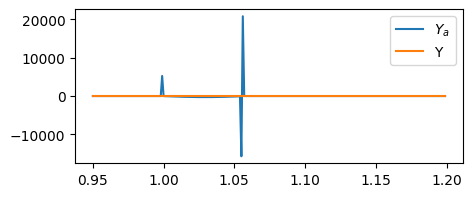

In [6]:
hitrost = 30 # km/h
hitrost = hitrost/3.6; # m/s
L = 0.5; # m
print(f'Čas v [s] za prevozit 0.5 m: {L/hitrost:.3f} s')

ff = 1/(2*L/hitrost); # Hz
y = np.sin(2 * np.pi * ff * t)
plt.figure(figsize=(6,2))
# plt.plot(t, y)
t1 = 1/(2*ff);
print(f'{t1:.3f} s') # čas pol cikla
print(f'{ff} Hz') # frekvenca Hz
plt.xlim(0, 0.2)

t11 = t1 % (t[1] - t[0])
T1 = t1 - t11 
T1

o = 0.1; #m - višina policaja
Y = np.zeros_like(t)
t_index = np.where(t == T1)
t2 = 1000 + t_index[0][0] -2
Y[1000:t2] = y[0:t2-1000] * o;

plt.plot(t[:5000], Y[:5000])
plt.xlim(0, 2.8)
plt.ylabel('Y [m]')
plt.xlabel('t [s]')

delta_t=t[1]-t[0]

Y_v = np.diff(Y)/delta_t
Y_a = np.diff(Y_v)/delta_t

plt.figure(figsize=(5,2))
plt.plot(t[950:1200], Y_a[950:1200], label=f'$Y_a$')
plt.plot(t[950:1200], Y[950:1200], label='Y')
plt.legend()

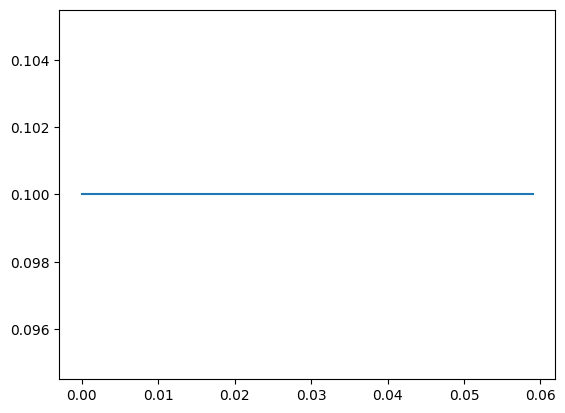

In [7]:
a = np.ones(60)
a = a/10
# a = 0.005 * np.sin(0.025 * np.pi * t)
plt.plot(t[:len(a)], a)

(0.8, 1.2)

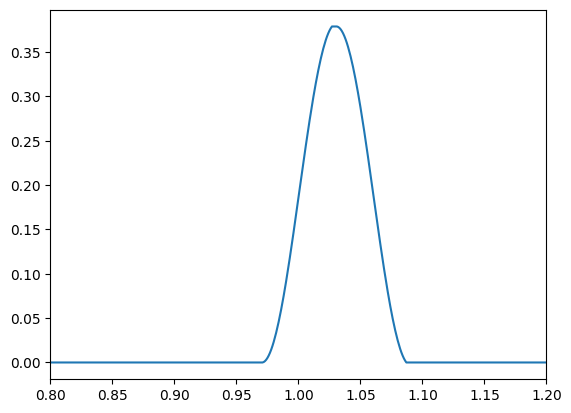

In [8]:
YY = np.convolve(Y, a, mode='same')
plt.plot(t[:40000], YY[:40000])
plt.xlim(0.8, 1.2)

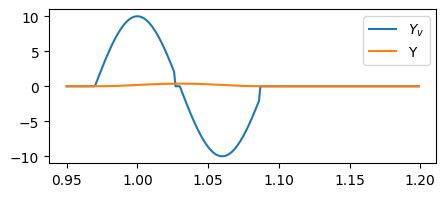

In [9]:
YY_v = np.diff(YY)/delta_t
YY_a = np.diff(YY_v)/delta_t

plt.figure(figsize=(5,2))
plt.plot(t[950:1200], YY_v[950:1200], label=f'$Y_v$')
# plt.plot(t[950:1200], YY_a[950:1200], label=f'$Y_a$')
plt.plot(t[950:1200], YY[950:1200], label='Y')
plt.legend()

## Vzbujanje s 1 sinusnim valom repmaknjenim za polovico gor

In [10]:
t= np.linspace(0, 5, 50001)

Čas v [s] za prevozit 0.5 m: 0.060 s
0.120 s
8.333 Hz


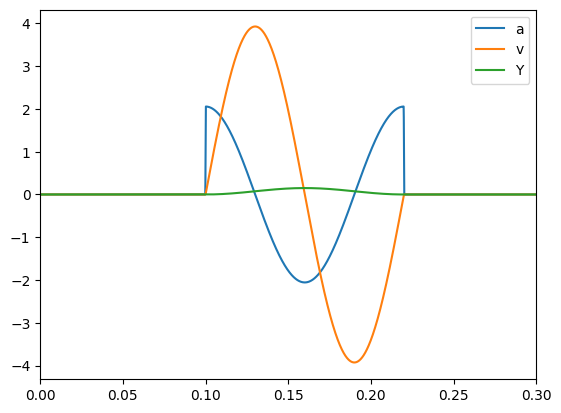

In [21]:
hitrost = 30 # km/h
hitrost = hitrost/3.6; # m/s
L = 0.5; # m
print(f'Čas v [s] za prevozit 0.5 m: {L/hitrost:.3f} s')

ff = 1/(2*L/hitrost); # Hz
y = np.sin(2 * np.pi * ff * t + 3*np.pi/2) + 1
t1 =2* 1/(2*ff);
print(f'{t1:.3f} s') # čas pol cikla
print(f'{ff:.3f} Hz') # frekvenca Hz
plt.xlim(0, 0.2)

t11 = t1 % (t[1] - t[0])
T1 = t1 - t11 
T1

o = 1/2 * 0.15; #m - višina policaja
Y = np.zeros_like(t)
t_index = np.where(t == T1)
t2 = 1000 + t_index[0][0] +1
Y[1000:t2] = y[0:t2-1000] * o;

plt.plot(t, 0.01*np.gradient(np.gradient(Y)/delta_t)/delta_t, label="a")
plt.plot(t, np.gradient(Y,delta_t), label = "v")
plt.plot(t, Y, label="Y")
plt.xlim(0,0.3)
# plt.xlim(0.0975, 0.1025)
plt.legend()